## Run analysis on station summary data for questions 1 & 2

In [1]:
import pandas as pd
import numpy as np
from station import Station
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

%load_ext autoreload
%autoreload

In [14]:
# read in data files
ride_df = pd.read_csv('data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')
map_df = pd.read_csv('data/CTA_-_System_Information_-_List_of__L__Stops.csv')
station_map_names = {'Lake':'Lake/State', 'Jackson':'Jackson/State',
                     'Washington':'Washington/Dearborn', 'Morgan':'Morgan-Lake'}
map_df.replace({"STATION_NAME": station_map_names}, inplace=True)

In [2]:
station_summary = pd.read_csv('data/station_summary.csv')

In [ ]:
# to_remove = station_summary[station_summary['Sat_mean'] == 0].index[0]
# station_summary.drop([to_remove], inplace=True)
station_summary['weekday-sat'] = station_summary['Weekday_mean'
                                                ] - station_summary['Sat_mean']
station_summary['weekday-sun'] = station_summary['Weekday_mean'
                                                ] - station_summary['Sun/Hol_mean']

In [3]:
# Find station with highest daily mean
station_summary.loc[station_summary.daily_mean.idxmax()]

Unnamed: 0                    133
Unnamed: 0.1                  133
2017_mean                 16500.1
2017_std                  7487.37
2018_mean                 16338.2
2018_predicted_mean         17052
2018_predicted_std         6151.9
2018_std                   7388.6
2019_predicted_mean       17140.1
2019_predicted_std        6072.62
2020_predicted_mean       17432.9
2020_predicted_std        6064.77
2021_predicted_mean       17724.7
2021_predicted_std        6073.84
2022_predicted_mean       17984.2
2022_predicted_std        6112.43
2023_predicted_mean       18084.4
2023_predicted_std        6055.18
5_yr_num_diff             328.064
5_yr_pct_diff           0.0214307
Sat_mean                   5112.7
Sat_std                   1882.36
Sun/Hol_mean              3906.94
Sun/Hol_std               1620.32
Weekday_mean              17965.6
Weekday_std               2868.45
daily_mean                13901.9
daily_std                  6714.7
latitude                  41.8857
longitude     

In [6]:
high_means = station_summary.sort_values(by='daily_mean', ascending=False).iloc[0:10]

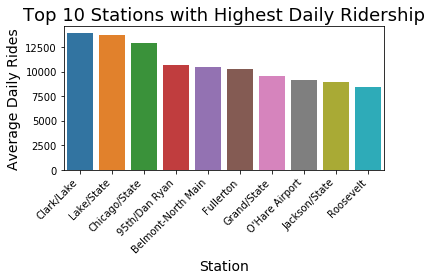

In [10]:
# Plot stations with highest daily means
fig, ax = plt.subplots()
sns.barplot(x='station', y='daily_mean', data=high_means, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Top 10 Stations with Highest Daily Ridership', fontsize=18)
ax.set_xlabel('Station', fontsize=14)
ax.set_ylabel('Average Daily Rides', fontsize=14)
plt.tight_layout()
plt.savefig('figs/dailyrides_mean.png')

In [11]:
# Find Washington/Wabash's std
station_summary[station_summary['station']=='Washington/Wabash']

,Unnamed: 0,Unnamed: 0.1,2017_mean,2017_std,2018_mean,2018_predicted_mean,2018_predicted_std,2018_std,2019_predicted_mean,2019_predicted_std,...,Weekday_std,daily_mean,daily_std,latitude,longitude,num_na,num_yrs_from_past_5,station,weekday-sat,weekday-sun
144,145,146,6646.986928,4142.266059,8217.79558,9326.215139,2165.349684,2713.632413,10697.046356,2194.505446,...,3035.752612,7498.233533,3525.173041,41.88322,-87.626189,0,1,Washington/Wabash,3886.143697,5519.735043


### Plot stations with high standard deviations by day of the week & season

In [15]:
high_stds = station_summary.sort_values(by='daily_std', ascending=False).iloc[0:10]
high_stations = high_stds.station.tolist()
high_stds.set_index('station', inplace=True)

In [16]:
for stat in high_stations:
    stat = Station(stat, ride_df, map_df)
    stat.make_layered_hist('daytype')

hist_Clark_Lake_daytype.png
hist_Lake_State_daytype.png
hist_Jackson_State_daytype.png
hist_Washington_State_daytype.png
hist_Addison-North Main_daytype.png
hist_95th_Dan Ryan_daytype.png
hist_Washington_Wabash_daytype.png
hist_Washington_Dearborn_daytype.png
hist_Fullerton_daytype.png
hist_Monroe_State_daytype.png


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
for stat in high_stations:
    stat = Station(stat, ride_df, map_df)
    stat.make_layered_hist('season')

hist_Clark_Lake_season.png
hist_Lake_State_season.png
hist_Jackson_State_season.png
hist_Washington_State_season.png
hist_Addison-North Main_season.png
hist_95th_Dan Ryan_season.png
hist_Washington_Wabash_season.png
hist_Washington_Dearborn_season.png
hist_Fullerton_season.png
hist_Monroe_State_season.png


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

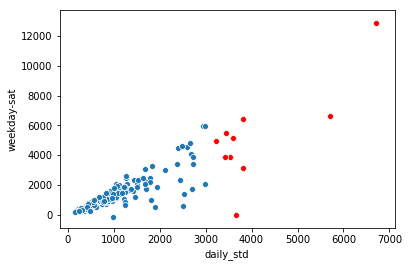

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(x="daily_std", y="weekday-sat", data=station_summary, ax=ax)
sns.scatterplot(x="daily_std", y="weekday-sat", data=high_stds, color='red', ax=ax)

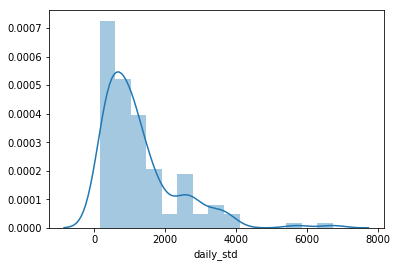

In [19]:
sns.distplot(station_summary['daily_std'])